Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
data, target, coef = datasets.make_regression(n_samples=10000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)

In [3]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [4]:
# Добавим единичный столбец
data = np.hstack([np.ones((data.shape[0], 1)), data])

In [5]:
# Градиентный спуск
def grad(X, y, iterations, alpha):
    
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    w_list = [W.copy()]
    errors = []
    n = X.shape[0]
    
    for i in range(iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)

        old_W = W.copy()
        W -= (alpha * (1/n * 2 * X.T @ (y_pred - y)))

        w_list.append(W.copy())
        errors.append(err)

        if i % 100 == 0:
            print(i, W, err)

        if np.linalg.norm(W - old_W, ord=2) < 1e-6:
            y_pred = np.dot(X, W)
            err = calc_mse(y, y_pred)
            errors.append(err)
            print(i, W, err)
            break
        
    w_list = np.array(w_list)
    
    return y_pred, W, w_list, errors

In [6]:
#Стохастический градиентный спуск
def sgd(X, y, iterations, qty_in_batch=1, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    w_list = [W.copy()]
    errors = []
    n = X.shape[0]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)

            X_tmp = X[start_ : end_, :]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(X_tmp, W)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot(X_tmp.T, (y_pred_tmp - y_tmp))))
            
            w_list.append(W.copy())
            errors.append(err)

        if i % (iterations / 10) == 0:
            print(i, W, err)
        
        if i == iterations:
            y_pred_tmp = np.dot(X_tmp, W)
            errors.append(calc_mse(y_tmp, y_pred_tmp))
            print(i, W, err)
    
    w_list = np.array(w_list)
    
    return y_pred_tmp, W, w_list, errors

In [7]:
alpha = 1e-1
y_pred1, W1, w_list1, errors1 = grad(data, target, 10000, alpha)

0 [0.39984846 9.29665216 0.9756307 ] 2273.4948218417258
73 [-4.49079348e-02  4.74814648e+01  1.63372090e+00] 25.174674610296258


In [8]:
y_pred2, W2, w_list2, errors2 = sgd(data, target, 100, alpha=0.01)

10 [0.407934   8.4206131  0.93316167] 831.4368777130195
20 [ 0.33359943 15.4409269   1.14721939] 524.3100866887171
30 [ 0.27137983 21.19929639  1.30642869] 325.43658357974397
40 [ 0.21931682 25.92259922  1.42368637] 197.8138539806547
50 [ 0.17576551 29.79691746  1.50900728] 116.8920197453218
60 [ 0.13934493 32.97487438  1.57014698] 66.41706415818965
70 [ 0.10889617 35.58165158  1.61309308] 35.65566510241394
80 [ 0.083447   37.71992379  1.64245236] 17.543458885921765
90 [ 0.06218218 39.47390614  1.66175559] 7.450326050401246
100 [ 0.04441832 40.91267348  1.67369686] 2.357814306021277
100 [ 0.04441832 40.91267348  1.67369686] 2.357814306021277


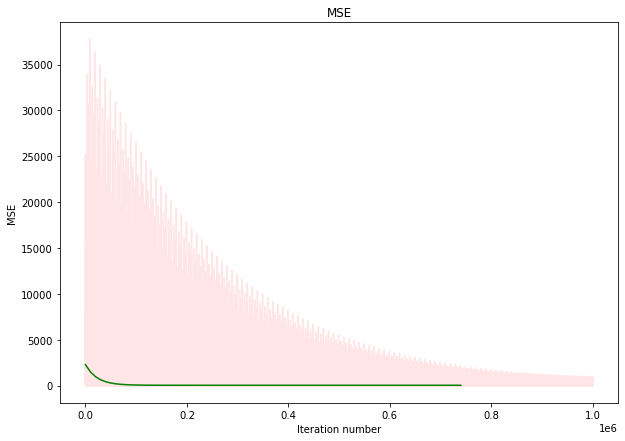

In [9]:
plt.figure(figsize=(10, 7))
plt.plot(range(len(errors2)), errors2, alpha=0.1, color='red')
plt.plot(np.arange(0,len(errors1)*data.shape[0],data.shape[0]), errors1, color='green')

plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

plt.show()

Скорость сходимости градиентного спуска выше, чем скорость сходимости SGD

Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [10]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [11]:
#Стандартизируем признаки
data_st = data.copy()
for i in range(1, data.shape[1]):
    data_st[:, i] = calc_std_feat(data_st[:, i])

In [12]:
def ridge_gradient_descent(X, y, iterations, lambda_, alpha):
    
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    w_list = [W.copy()]
    errors = []
    n = X.shape[0]
    
    for i in range(iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)

        old_W = W.copy()
        W -= (alpha * (1/n * 2 * X.T @ (y_pred - y) + 2 * lambda_ * W))

        w_list.append(W.copy())
        errors.append(err)

        if i % 100 == 0:
              print(i, W, err)

        if np.linalg.norm(W - old_W, ord=2) < 1e-6:
            y_pred = np.dot(X, W)
            err = calc_mse(y, y_pred)
            errors.append(err)
            print(i, W, err)
            break
        
    w_list = np.array(w_list)
    
    return y_pred, W, w_list, errors

In [13]:
def ridge_sgd(X, y, iterations, lambda_=1e-2, qty_in_batch=1, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    w_list = [W.copy()]
    errors = []
    n = X.shape[0]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)


            X_tmp = X[start_ : end_, :]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(X_tmp, W)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot(X_tmp.T, (y_pred_tmp - y_tmp)) + 2 * lambda_ * W))
            
        w_list.append(W.copy())
        errors.append(err)

        if i % (iterations / 10) == 0:
             print(i, W, err)
        
        if i == iterations:
            y_pred_tmp = np.dot(X_tmp, W)
            errors.append(calc_mse(y_tmp, y_pred_tmp))
            print(i, W, err)

    
    w_list = np.array(w_list)
    
    return y_pred_tmp, W, w_list, errors

In [14]:
_, _, _, errors3 = ridge_gradient_descent(data_st, target, 10000, i, alpha)

0 [0.20080321 9.39788832 0.71377114] 2273.5872343939063
18 [3.52926167e-03 1.57551446e+01 6.88703222e-01] 1019.0069785389888


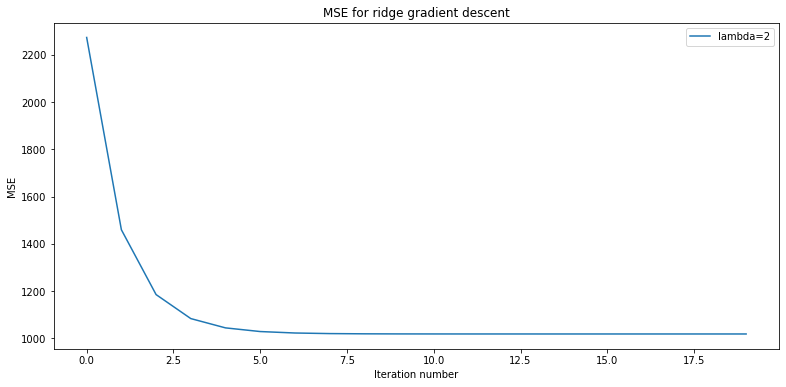

In [15]:
plt.figure(figsize=(13, 6))
plt.plot(range(len(errors3)), errors3, label=f'lambda={i}')
plt.title('MSE for ridge gradient descent')
plt.legend()
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.show()

In [16]:
_, _, _, errors4 = ridge_sgd(data_st, target, 20, lambda_=i, alpha=1e-1)

2 [-0.000284    0.00102003  0.0006774 ] 1295.4917446621132
4 [-0.000284    0.00102003  0.0006774 ] 1295.4917446621132
6 [-0.000284    0.00102003  0.0006774 ] 1295.4917446621132
8 [-0.000284    0.00102003  0.0006774 ] 1295.4917446621132
10 [-0.000284    0.00102003  0.0006774 ] 1295.4917446621132
12 [-0.000284    0.00102003  0.0006774 ] 1295.4917446621132
14 [-0.000284    0.00102003  0.0006774 ] 1295.4917446621132
16 [-0.000284    0.00102003  0.0006774 ] 1295.4917446621132
18 [-0.000284    0.00102003  0.0006774 ] 1295.4917446621132
20 [-0.000284    0.00102003  0.0006774 ] 1295.4917446621132
20 [-0.000284    0.00102003  0.0006774 ] 1295.4917446621132


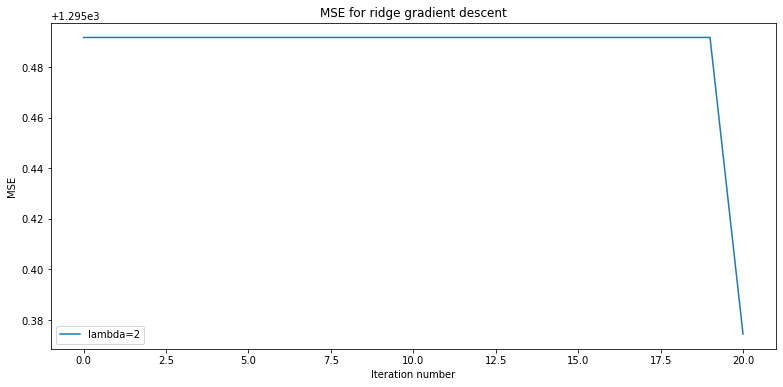

In [17]:
plt.figure(figsize=(13, 6))
plt.plot(range(len(errors4)), errors4, label=f'lambda={i}')
plt.title('MSE for ridge gradient descent')
plt.legend()
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.show()

При регуляризации показатели ошибки увеличились